In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
def get_surface_currents(filename, padding = 20):
    # Load file
    data = np.load(filename, allow_pickle=True)

    electric = data['electric']
    magnetic = data['magnetic']
    
    face_elec = electric[0]
    face_mag = magnetic[0]
    t = len(face_elec)
    Js_0 = np.zeros((t, 2, padding, padding))  # Js[t, 0] = Jy, Js[t, 1] = Jz
    Ms_0 = np.zeros((t, 2, padding, padding))  # Ms[t, 0] = My, Ms[t, 1] = Mz
    for t, (e_snap, m_snap) in enumerate(zip(face_elec, face_mag)):
        Ex, Ey, Ez = e_snap
        Hx, Hy, Hz = m_snap
        Hz = Hx[0, :, :]
        Hy = Hy[0, :, :]
        Ez = Ex[0, :, :]
        Ey = Ey[0, :, :]

        Ms_0[t, 0] = Ez        # My
        Ms_0[t, 1] = -Ey       # Mz

        Js_0[t, 0] = -Hz       # Jy
        Js_0[t, 1] = Hy        # Jz
    
    face_elec = electric[1]
    face_mag = magnetic[1]
    t = len(face_elec)
    Js_1 = np.zeros((t, 2, padding, padding))  # Js[t, 0] = Jx, Js[t, 1] = Jy
    Ms_1 = np.zeros((t, 2, padding, padding))  # Ms[t, 0] = Mx, Ms[t, 1] = My
    for t, (e_snap, m_snap) in enumerate(zip(face_elec, face_mag)):
        Ex, Ey, Ez = e_snap
        Hx, Hy, Hz = m_snap

        Hx = Hx[:, :, 0]
        Hy = Hy[:, :, 0]
        Ex = Ex[:, :, 0]
        Ey = Ey[:, :, 0]

        Ms_1[t, 0] = -Ey        # Mx
        Ms_1[t, 1] = Ex       # My

        Js_1[t, 0] = Hy       # Jx
        Js_1[t, 1] = -Hx        # Jy    

        
    face_elec = electric[2]
    face_mag = magnetic[2]
    t = len(face_elec)
    Js_2 = np.zeros((t, 2, padding, padding))   # Js[t, 0] = Jx, Js[t, 1] = Jz
    Ms_2 = np.zeros((t, 2, padding, padding))  # Ms[t, 0] = Mx, Ms[t, 1] = Mz
    for t, (e_snap, m_snap) in enumerate(zip(face_elec, face_mag)):
        Ex, Ey, Ez = e_snap
        Hx, Hy, Hz = m_snap

        Hx = Hx[:, 0, :]
        Hz = Hy[:, 0, :]
        Ex = Ex[:, 0, :]
        Ez = Ey[:, 0, :]

        Ms_2[t, 0] = Ez        # Mx
        Ms_2[t, 1] = -Ex       # Mz

        Js_2[t, 0] = -Hz       # Jx
        Js_2[t, 1] = Hx        # Jz    

    face_elec = electric[3]
    face_mag = magnetic[3]
    t = len(face_elec)
    Js_3 = np.zeros((t, 2, padding, padding))  # Js[t, 0] = Jx, Js[t, 1] = Jy
    Ms_3 = np.zeros((t, 2, padding, padding))  # Ms[t, 0] = Mx, Ms[t, 1] = My
    for t, (e_snap, m_snap) in enumerate(zip(face_elec, face_mag)):
        Ex, Ey, Ez = e_snap
        Hx, Hy, Hz = m_snap

        Hx = Hx[:, :, 0]
        Hy = Hy[:, :, 0]
        Ex = Ex[:, :, 0]
        Ey = Ey[:, :, 0]

        Ms_3[t, 0] = Ey        # Mx
        Ms_3[t, 1] = -Ex       # My

        Js_3[t, 0] = -Hy       # Jx
        Js_3[t, 1] = Hx        # Jy    

    face_elec = electric[4]
    face_mag = magnetic[4]
    t = len(face_elec)
    Js_4 = np.zeros((t, 2, padding, padding))   # Js[t, 0] = Jx, Js[t, 1] = Jz
    Ms_4 = np.zeros((t, 2, padding, padding))  # Ms[t, 0] = Mx, Ms[t, 1] = Mz
    for t, (e_snap, m_snap) in enumerate(zip(face_elec, face_mag)):
        Ex, Ey, Ez = e_snap
        Hx, Hy, Hz = m_snap

        Hx = Hx[:, 0, :]
        Hz = Hy[:, 0, :]
        Ex = Ex[:, 0, :]
        Ez = Ey[:, 0, :]

        Ms_4[t, 0] = -Ez        # Mx
        Ms_4[t, 1] = Ex       # Mz

        Js_4[t, 0] = Hz       # Jx
        Js_4[t, 1] = -Hx        # Jz 

    face_elec = electric[5]
    face_mag = magnetic[5]
    t = len(face_elec)
    Js_5 = np.zeros((t, 2, padding, padding))  # Js[t, 0] = Jy, Js[t, 1] = Jz
    Ms_5 = np.zeros((t, 2, padding, padding))  # Ms[t, 0] = My, Ms[t, 1] = Mz
    for t, (e_snap, m_snap) in enumerate(zip(face_elec, face_mag)):
        Ex, Ey, Ez = e_snap
        Hx, Hy, Hz = m_snap
        Hz = Hx[0, :, :]
        Hy = Hy[0, :, :]
        Ez = Ex[0, :, :]
        Ey = Ey[0, :, :]

        Ms_5[t, 0] = -Ez        # My
        Ms_5[t, 1] = Ey       # Mz

        Js_5[t, 0] = Hz       # Jy
        Js_5[t, 1] = -Hy        # Jz

    Js_faces = [Js_0, Js_1, Js_2, Js_3, Js_4, Js_5]
    Ms_faces = [Ms_0, Ms_1, Ms_2, Ms_3, Ms_4, Ms_5]

    return Js_faces, Ms_faces


def generate_surface_coordinates(N=20, cube_size=1.0):
    """
    Returns a NumPy array of shape (6, 3, N, N) where:
    - 6 is the number of faces
    - 3 corresponds to X, Y, Z coordinates
    - N x N is the spatial resolution of each face
    """
    L = cube_size
    lin = np.linspace(-L/2, L/2, N)
    coords = np.zeros((6, 3, N, N), dtype=np.float32)

    # Face 0: -x (Y-Z plane at x = -L/2)
    Y, Z = np.meshgrid(lin, lin, indexing='ij')
    coords[0, 0] = -L/2
    coords[0, 1] = Y
    coords[0, 2] = Z

    # Face 1: -z (X-Y plane at z = -L/2)
    X, Y = np.meshgrid(lin, lin, indexing='ij')
    coords[1, 0] = X
    coords[1, 1] = Y
    coords[1, 2] = -L/2

    # Face 2: -y (X-Z plane at y = -L/2)
    X, Z = np.meshgrid(lin, lin, indexing='ij')
    coords[2, 0] = X
    coords[2, 1] = -L/2
    coords[2, 2] = Z

    # Face 3: +z (X-Y plane at z = +L/2)
    coords[3, 0] = X
    coords[3, 1] = Y
    coords[3, 2] = +L/2

    # Face 4: +y (X-Z plane at y = +L/2)
    coords[4, 0] = X
    coords[4, 1] = +L/2
    coords[4, 2] = Z

    # Face 5: +x (Y-Z plane at x = +L/2)
    coords[5, 0] = +L/2
    coords[5, 1] = Y
    coords[5, 2] = Z

    return coords

import numpy as np

# Constants
c = 299792458  # m/s
mu0 = 4 * np.pi * 1e-7
eps0 = 1 / (mu0 * c ** 2)

def cartesian_to_spherical(xyz):
    x, y, z = xyz
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    return r, theta, phi

def unit_vector_spherical(theta, phi):
    # returns [x, y, z] unit vectors for r, theta, phi directions
    return (
        np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)]),
        np.array([np.cos(theta)*np.cos(phi), np.cos(theta)*np.sin(phi), -np.sin(theta)]),
        np.array([-np.sin(phi), np.cos(phi), 0])
    )

def surface_normals():
    return [
        np.array([-1,0,0]),   # -x
        np.array([0,0,-1]),   # -z
        np.array([0,-1,0]),   # -y
        np.array([0,0,1]),    # +z
        np.array([0,1,0]),    # +y
        np.array([1,0,0])     # +x
    ]

def face_tangential_to_cartesian(face_id, curr):
    # curr: length 2 array, as returned by Js_patch or Ms_patch
    if face_id == 0 or face_id == 5:   # -x, +x
        v = np.array([0, curr[0], curr[1]])
    elif face_id == 1 or face_id == 3: # -z, +z
        v = np.array([curr[0], curr[1], 0])
    elif face_id == 2 or face_id == 4: # -y, +y
        v = np.array([curr[0], 0, curr[1]])
    else:
        raise ValueError("face_id out of range (should be 0–5 inclusive)")
    return v

import numpy as np
from tqdm import tqdm

def calculate_far_field_time_trace(
    Js_faces, Ms_faces, coords,
    obs_r, obs_theta, obs_phi,
    t_array, dt, cube_size
):
    """
    Compute far-field E(t) traces at a single observation direction for each time in t_array.

    Js_faces, Ms_faces : lists of 6 arrays each of shape (t_near, 2, N, N)
    coords              : (6, 3, N, N) surface coordinates (matching Js_faces grid)
    obs_r, obs_theta, obs_phi : observation spherical coords (r, theta, phi)
    t_array             : observation times (1D array)
    dt                  : time spacing of stored near-field snapshots (seconds)
    cube_size           : side length of cube (meters)

    Returns:
        far_E_trace : np.ndarray shape (len(t_array), 3) -> (Ex, Ey, Ez)
    """

    # observation unit vector
    hat_r = np.array([
        np.sin(obs_theta) * np.cos(obs_phi),
        np.sin(obs_theta) * np.sin(obs_phi),
        np.cos(obs_theta)
    ], dtype=np.float64)

    N = coords.shape[-1]
    # patch spacing: generate_surface_coordinates used linspace -> spacing = L/(N-1)
    if N > 1:
        delta = cube_size / float(N - 1)
    else:
        delta = cube_size
    delta_S = delta * delta

    # Near-field time axis built from stored snapshots (assume all faces have same time length)
    t_near = Js_faces[0].shape[0]
    near_t = np.arange(0.0, t_near * dt, dt)  # times corresponding to Js faces: 0, dt, ..., (t_near-1)*dt

    far_E_trace = np.zeros((len(t_array), 3), dtype=np.float64)

    # small helper to map tangential 2-vector to cartesian using your face convention
    def tangential_to_cart(face_id, vec2):
        return face_tangential_to_cartesian(face_id, vec2)

    # loop over observation times
    for obs_idx, t_obs in enumerate(tqdm(t_array, desc="obs times")):
        far_E = np.zeros(3, dtype=np.float64)

        # sum contributions from each face and each patch
        for face_id in range(6):
            Js = Js_faces[face_id]  # shape (t_near, 2, N, N)
            Ms = Ms_faces[face_id]
            xyz = coords[face_id]   # (3, N, N)

            # iterate patches
            for i in range(N):
                for j in range(N):
                    r0 = np.array([xyz[0, i, j], xyz[1, i, j], xyz[2, i, j]], dtype=np.float64)
                    R_vec = obs_r * hat_r - r0
                    R = np.linalg.norm(R_vec)

                    # retarded time
                    ret = t_obs - R / c

                    # If ret is outside the stored near-field times, skip or clamp.
                    # We'll process boundary cases (use first/last sample) instead of skipping only if necessary.
                    if ret < near_t[0] and ret < near_t[0] - 1e-15:
                        continue
                    if ret > near_t[-1] and ret > near_t[-1] + 1e-15:
                        continue

                    # find interval in near_t where ret lies
                    t_idx = np.searchsorted(near_t, ret, side='left')

                    # handle boundary cases explicitly
                    if t_idx == 0:
                        # use first sample and forward difference for derivative if possible
                        s0 = Js[0, :, i, j].astype(np.float64)
                        m0 = Ms[0, :, i, j].astype(np.float64)
                        if t_near > 1:
                            s1 = Js[1, :, i, j].astype(np.float64)
                            m1 = Ms[1, :, i, j].astype(np.float64)
                            dJs_dt = (s1 - s0) / dt
                            dMs_dt = (m1 - m0) / dt
                        else:
                            dJs_dt = np.zeros(2, dtype=np.float64)
                            dMs_dt = np.zeros(2, dtype=np.float64)

                    elif t_idx >= t_near:
                        # ret at or beyond last stored time => use last sample and backward diff
                        sN = Js[-1, :, i, j].astype(np.float64)
                        mN = Ms[-1, :, i, j].astype(np.float64)
                        if t_near > 1:
                            sNm1 = Js[-2, :, i, j].astype(np.float64)
                            mNm1 = Ms[-2, :, i, j].astype(np.float64)
                            dJs_dt = (sN - sNm1) / dt
                            dMs_dt = (mN - mNm1) / dt
                        else:
                            dJs_dt = np.zeros(2, dtype=np.float64)
                            dMs_dt = np.zeros(2, dtype=np.float64)

                    else:
                        # normal interpolation between t_idx-1 and t_idx
                        s0 = Js[t_idx - 1, :, i, j].astype(np.float64)
                        s1 = Js[t_idx, :, i, j].astype(np.float64)
                        m0 = Ms[t_idx - 1, :, i, j].astype(np.float64)
                        m1 = Ms[t_idx, :, i, j].astype(np.float64)

                        # linear interpolation fraction within the interval
                        t0 = near_t[t_idx - 1]
                        alpha = (ret - t0) / dt
                        # clamp alpha numerically
                        alpha = 0.0 if alpha < 0.0 else (1.0 if alpha > 1.0 else alpha)

                        # Js_patch and Ms_patch at ret (not strictly needed here since we use derivatives)
                        # Js_patch = (1.0 - alpha) * s0 + alpha * s1
                        # Ms_patch = (1.0 - alpha) * m0 + alpha * m1

                        # time derivative over the interval (constant if Js linear within dt)
                        dJs_dt = (s1 - s0) / dt
                        dMs_dt = (m1 - m0) / dt

                    # Convert tangential derivatives to Cartesian vectors
                    dJs_cart = tangential_to_cart(face_id, dJs_dt)   # 3-vector
                    dMs_cart = tangential_to_cart(face_id, dMs_dt)

                    # transverse projection and cross products per the formula
                    proj_J = dJs_cart - hat_r * np.dot(hat_r, dJs_cart)   # = hat_r x (hat_r x dJs/dt)
                    proj_M = np.cross(hat_r, dMs_cart)

                    # Far-field integrand:
                    # E += [ -mu0/(4*pi*r) * proj_J + 1/(4*pi*c*r) * proj_M ] * dS
                    # using r approx = obs_r (far-field) in prefactor
                    far_E += (-mu0 / (4.0 * np.pi * obs_r) * proj_J +
                              1.0 / (4.0 * np.pi * c * obs_r) * proj_M) * delta_S

        far_E_trace[obs_idx, :] = far_E

    return far_E_trace


In [ ]:
Js_faces, Ms_faces= get_surface_currents('nfft_snapshots_model1.npz')
    # ---- Parameters ----
N = 20               # Number of grid points per face (surface resolution)
T = 100              # Number of time samples
cube_size = 0.20     # Side length of cube, meters
dt = 1e-9           # Time step, seconds
t_array = np.arange(0, T*dt, dt)   # t = 0, dt, 2dt, ..., (T-1)*dt

# ---- Surface coordinates ----
coords = generate_surface_coordinates(N=N, cube_size=cube_size)  # (6, 3, N, N)

obs_r = 1.0
obs_theta = np.pi/3
obs_phi = np.pi/4
far_E_trace = calculate_far_field_time_trace(
    Js_faces=Js_faces,
    Ms_faces=Ms_faces,
    coords=coords,
    obs_r=obs_r,
    obs_theta=obs_theta,
    obs_phi=obs_phi,
    t_array=t_array,
    dt=dt,
    cube_size=cube_size
)



obs times: 100%|██████████| 100/100 [00:29<00:00,  3.39it/s]


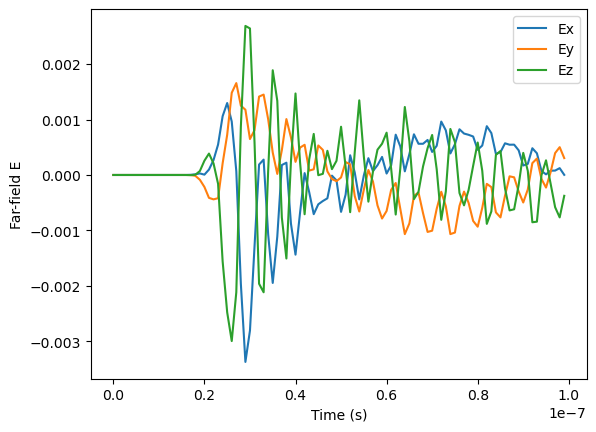

In [3]:
# To plot or analyze:
import matplotlib.pyplot as plt
plt.plot(t_array, far_E_trace[:, 0], label='Ex')
plt.plot(t_array, far_E_trace[:, 1], label='Ey')
plt.plot(t_array, far_E_trace[:, 2], label='Ez')
plt.xlabel('Time (s)')
plt.ylabel('Far-field E')
plt.legend()
plt.show()

obs times: 100%|██████████| 100/100 [00:16<00:00,  5.98it/s]


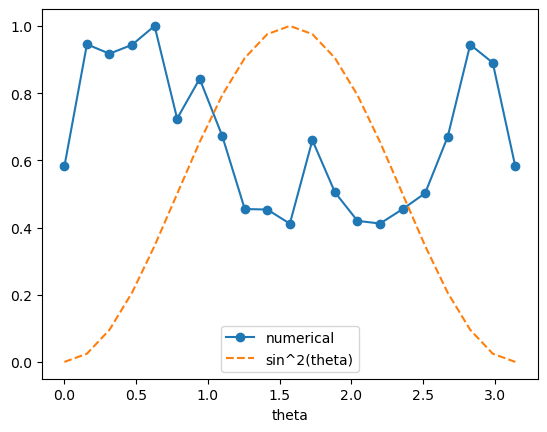

RMSE: 0.5461602663655789


In [4]:
thetas = np.linspace(0, np.pi, 21)
phi = 0.0
peaks = []
for th in thetas:
    far = calculate_far_field_time_trace(
        Js_faces=Js_faces,
        Ms_faces=Ms_faces,
        coords=coords,
        obs_r=1.0,
        obs_theta=th,
        obs_phi=phi,
        t_array=t_array,
        dt=dt,
        cube_size=cube_size
    )
    peaks.append(np.max(np.linalg.norm(far, axis=1)))

peaks = np.array(peaks)
peaks_norm = peaks / peaks.max()
theory = np.sin(thetas)**2
theory_norm = theory / theory.max()

# Compare (e.g., by plotting or computing error)
import matplotlib.pyplot as plt
plt.plot(thetas, peaks_norm, 'o-', label='numerical')
plt.plot(thetas, theory_norm, '--', label='sin^2(theta)')
plt.legend(); plt.xlabel('theta'); plt.show()

print("RMSE:", np.sqrt(np.mean((peaks_norm - theory_norm)**2)))


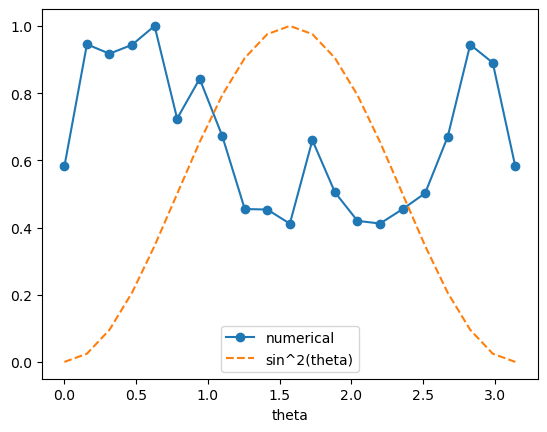

RMSE: 0.5461602663655789


In [5]:
peaks = np.array(peaks)
peaks_norm = peaks / peaks.max()
theory = np.sin(thetas)**2
theory_norm = theory / theory.max()
thetas = np.linspace(0, np.pi, 21)
# Compare (e.g., by plotting or computing error)
import matplotlib.pyplot as plt
plt.plot(thetas, peaks_norm, 'o-', label='numerical')
plt.plot(thetas, theory_norm, '--', label='sin^2(theta)')
plt.legend(); plt.xlabel('theta'); plt.show()

print("RMSE:", np.sqrt(np.mean((peaks_norm - theory_norm)**2)))


obs times: 100%|██████████| 100/100 [00:17<00:00,  5.77it/s]


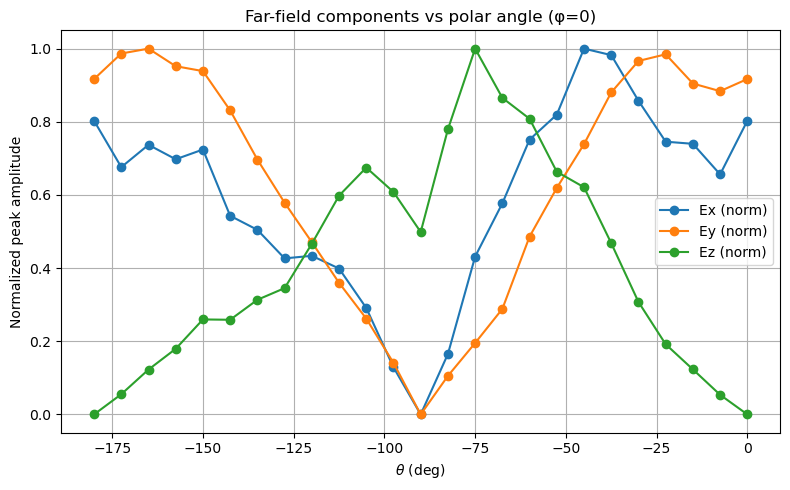

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
num_angles = 25
thetas = np.linspace(0, -np.pi, num_angles)  # radians
phi = 0.0
obs_r = 1.0  # 1 m radius for far-field sphere
dt = 1e-9    # adjust to your simulation's time step

# Storage for peak amplitudes of each component
Ex_peaks = []
Ey_peaks = []
Ez_peaks = []

for th in thetas:
    # Call your far-field calculation function
    far = calculate_far_field_time_trace(
        Js_faces=Js_faces,
        Ms_faces=Ms_faces,
        coords=coords,
        obs_r=1.0,
        obs_theta=th,
        obs_phi=phi,
        t_array=t_array,
        dt=dt,
        cube_size=cube_size
    )  # shape: [num_time_samples, 3] => (Ex, Ey, Ez)

    # Take peak absolute value for each component
    Ex_peaks.append(np.max(np.abs(far[:, 0])))
    Ey_peaks.append(np.max(np.abs(far[:, 1])))
    Ez_peaks.append(np.max(np.abs(far[:, 2])))

# Convert to arrays
Ex_peaks = np.array(Ex_peaks)
Ey_peaks = np.array(Ey_peaks)
Ez_peaks = np.array(Ez_peaks)

# Normalize each component
Ex_norm = Ex_peaks / np.max(Ex_peaks)
Ey_norm = Ey_peaks / np.max(Ey_peaks)
Ez_norm = Ez_peaks / np.max(Ez_peaks)

# Plot each
theta_deg = np.degrees(thetas)

plt.figure(figsize=(8, 5))
plt.plot(theta_deg, Ex_norm, 'o-', label='Ex (norm)')
plt.plot(theta_deg, Ey_norm, 'o-', label='Ey (norm)')
plt.plot(theta_deg, Ez_norm, 'o-', label='Ez (norm)')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel('Normalized peak amplitude')
plt.title('Far-field components vs polar angle (φ=0)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


obs times:   0%|          | 0/100 [00:00<?, ?it/s]

obs times: 100%|██████████| 100/100 [00:14<00:00,  6.74it/s]


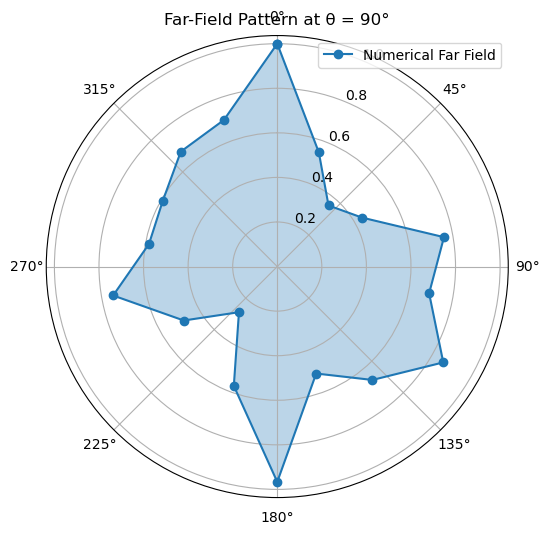

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
phi_values_deg = np.arange(0, 360, 20)  # 20° step
obs_theta = np.pi / 2   # horizontal plane (90° from dipole axis)
obs_r = 1.0              # 1 meter observation radius
dt = 1e-9                # adjust to your simulation timestep

# Storage for far-field magnitudes
magnitudes = []

for phi_deg in phi_values_deg:
    phi_rad = np.deg2rad(phi_deg)

    far = calculate_far_field_time_trace(
        Js_faces=Js_faces,
        Ms_faces=Ms_faces,
        coords=coords,
        obs_r=5.0,
        obs_theta=obs_theta,
        obs_phi=phi_rad,
        t_array=t_array,
        dt=dt,
        cube_size=cube_size
    )  # shape: [num_time_samples, 3] => (Ex, Ey, Ez)

    # Compute total E-field magnitude and take peak
    E_mag = np.linalg.norm(far, axis=1)
    peak_val = np.max(np.abs(E_mag))
    magnitudes.append(peak_val)

# Convert to numpy array and normalize
magnitudes = np.array(magnitudes)
magnitudes /= np.max(magnitudes)

# Create polar plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)

# For polar plot, angles in radians
phi_values_rad = np.deg2rad(phi_values_deg)

# Make it a closed loop for polar plot
phi_values_rad = np.append(phi_values_rad, phi_values_rad[0])
magnitudes = np.append(magnitudes, magnitudes[0])

ax.set_theta_zero_location('N')  # 0° at top
ax.set_theta_direction(-1)       # clockwise
ax.plot(phi_values_rad, magnitudes, 'o-', label="Numerical Far Field")
ax.fill(phi_values_rad, magnitudes, alpha=0.3)

ax.set_title("Far-Field Pattern at θ = 90°", va='bottom')
ax.legend()
plt.show()


obs times: 100%|██████████| 100/100 [00:17<00:00,  5.65it/s]


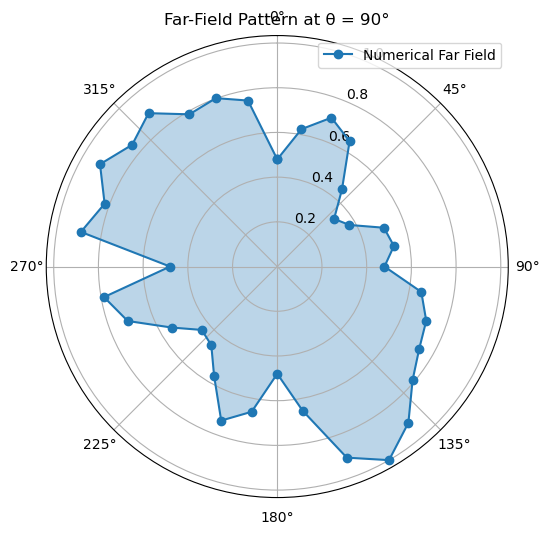

In [8]:
# Parameters
phi_values_deg = np.arange(0, 360, 10)  # 20° step
obs_theta = np.pi / 2   # horizontal plane (90° from dipole axis)
obs_r = 1.0              # 1 meter observation radius
dt = 1e-9                # adjust to your simulation timestep

# Storage for far-field magnitudes
magnitudes = []

for phi_deg in phi_values_deg:
    phi_rad = np.deg2rad(phi_deg)

    far = calculate_far_field_time_trace(
        Js_faces=Js_faces,
        Ms_faces=Ms_faces,
        coords=coords,
        obs_r=1.0,
        obs_theta=obs_theta,
        obs_phi=phi_rad,
        t_array=t_array,
        dt=dt,
        cube_size=cube_size
    )  # shape: [num_time_samples, 3] => (Ex, Ey, Ez)

    # Compute total E-field magnitude and take peak
    E_mag = np.linalg.norm(far, axis=1)
    peak_val = np.max(np.abs(E_mag))
    magnitudes.append(peak_val)

# Convert to numpy array and normalize
magnitudes = np.array(magnitudes)
magnitudes /= np.max(magnitudes)

# Create polar plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)

# For polar plot, angles in radians
phi_values_rad = np.deg2rad(phi_values_deg)

# Make it a closed loop for polar plot
phi_values_rad = np.append(phi_values_rad, phi_values_rad[0])
magnitudes = np.append(magnitudes, magnitudes[0])

ax.set_theta_zero_location('N')  # 0° at top
ax.set_theta_direction(-1)       # clockwise
ax.plot(phi_values_rad, magnitudes, 'o-', label="Numerical Far Field")
ax.fill(phi_values_rad, magnitudes, alpha=0.3)

ax.set_title("Far-Field Pattern at θ = 90°", va='bottom')
ax.legend()
plt.show()

obs times: 100%|██████████| 100/100 [00:19<00:00,  5.06it/s]


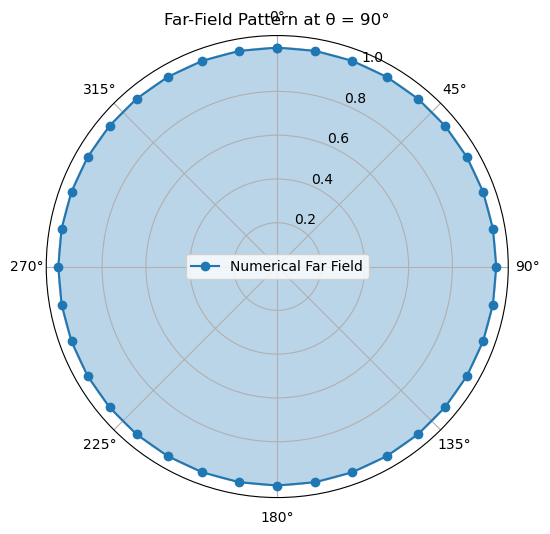

In [10]:
# Parameters
phi_values_deg = np.arange(0, 360, 10)  # 20° step
obs_theta = 0   # horizontal plane (90° from dipole axis)
obs_r = 1.0              # 1 meter observation radius
dt = 1e-9                # adjust to your simulation timestep

# Storage for far-field magnitudes
magnitudes = []

for phi_deg in phi_values_deg:
    phi_rad = np.deg2rad(phi_deg)

    far = calculate_far_field_time_trace(
        Js_faces=Js_faces,
        Ms_faces=Ms_faces,
        coords=coords,
        obs_r=1.0,
        obs_theta=obs_theta,
        obs_phi=phi_rad,
        t_array=t_array,
        dt=dt,
        cube_size=cube_size
    )  # shape: [num_time_samples, 3] => (Ex, Ey, Ez)

    # Compute total E-field magnitude and take peak
    E_mag = np.linalg.norm(far, axis=1)
    peak_val = np.max(np.abs(E_mag))
    magnitudes.append(peak_val)

# Convert to numpy array and normalize
magnitudes = np.array(magnitudes)
magnitudes /= np.max(magnitudes)

# Create polar plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)

# For polar plot, angles in radians
phi_values_rad = np.deg2rad(phi_values_deg)

# Make it a closed loop for polar plot
phi_values_rad = np.append(phi_values_rad, phi_values_rad[0])
magnitudes = np.append(magnitudes, magnitudes[0])

ax.set_theta_zero_location('N')  # 0° at top
ax.set_theta_direction(-1)       # clockwise
ax.plot(phi_values_rad, magnitudes, 'o-', label="Numerical Far Field")
ax.fill(phi_values_rad, magnitudes, alpha=0.3)

ax.set_title("Far-Field Pattern at θ = 90°", va='bottom')
ax.legend()
plt.show()

obs times: 100%|██████████| 100/100 [00:23<00:00,  4.19it/s]


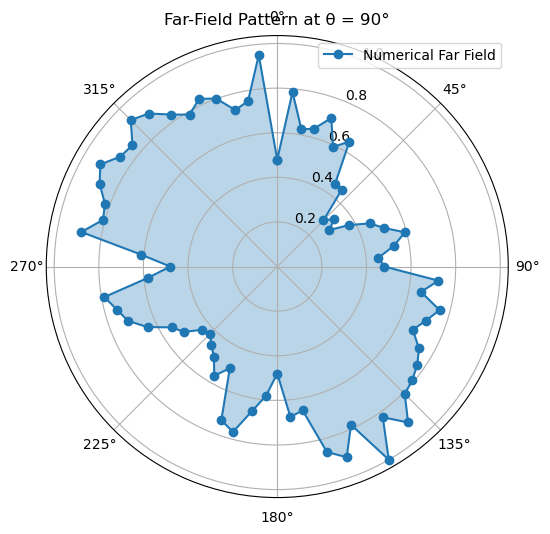

In [9]:
phi_values_deg = np.arange(0, 360, 5)  # 20° step
obs_theta = np.pi / 2   # horizontal plane (90° from dipole axis)
obs_r = 1.0              # 1 meter observation radius
dt = 1e-9                # adjust to your simulation timestep

# Storage for far-field magnitudes
magnitudes = []

for phi_deg in phi_values_deg:
    phi_rad = np.deg2rad(phi_deg)

    far = calculate_far_field_time_trace(
        Js_faces=Js_faces,
        Ms_faces=Ms_faces,
        coords=coords,
        obs_r=1.0,
        obs_theta=obs_theta,
        obs_phi=phi_rad,
        t_array=t_array,
        dt=dt,
        cube_size=cube_size
    )  # shape: [num_time_samples, 3] => (Ex, Ey, Ez)

    # Compute total E-field magnitude and take peak
    E_mag = np.linalg.norm(far, axis=1)
    peak_val = np.max(np.abs(E_mag))
    magnitudes.append(peak_val)

# Convert to numpy array and normalize
magnitudes = np.array(magnitudes)
magnitudes /= np.max(magnitudes)

# Create polar plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)

# For polar plot, angles in radians
phi_values_rad = np.deg2rad(phi_values_deg)

# Make it a closed loop for polar plot
phi_values_rad = np.append(phi_values_rad, phi_values_rad[0])
magnitudes = np.append(magnitudes, magnitudes[0])

ax.set_theta_zero_location('N')  # 0° at top
ax.set_theta_direction(-1)       # clockwise
ax.plot(phi_values_rad, magnitudes, 'o-', label="Numerical Far Field")
ax.fill(phi_values_rad, magnitudes, alpha=0.3)

ax.set_title("Far-Field Pattern at θ = 90°", va='bottom')
ax.legend()
plt.show()